In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, time

In [2]:
np.random.seed(1)

In [3]:
N = 64

In [4]:
poly = np.zeros((2, N))

In [5]:
def update_pos(pos, poly, poly_type='rw', Lattice=None):
    """
    perform 1 step of a random walk or self avoiding walk
    """
    if poly_type=='rw':
        rand_num = np.random.randint(0, 4) #0,1,2,3
        moves = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])
        poly[:, pos+1] = poly[:, pos] + moves[rand_num,:]
    elif poly_type=='saw':
        moves = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])
        (L_x,_)=Lattice.shape
        centre = math.floor(L_x/2)
        if pos>=1:
            prev_ind = [] #locations around pos which were occupied before
            for i in range(4):
                new_loc = poly[:, pos] + moves[i,:]
                if Lattice[int(centre+new_loc[0]), int(centre+new_loc[1])]>0:
#                     print(f'lattice site {(centre+new_loc[0], centre+new_loc[1])} is occupied')
                    prev_ind = prev_ind+[i]
#                 print(f"{[j for j in range(4)]}, prev_ind={prev_ind}")
            if len(prev_ind)<4:
                rand_num = np.random.choice([j for j in range(4) if j not in prev_ind])
                poly[:, pos+1] = poly[:, pos] + moves[rand_num,:] 
            else: #dead end- all 4 directions blocked
                rand_val = np.random.randint(0, 4)
                poly[:, pos+1] = poly[:,pos] + 2*moves[rand_val, :]
            Lattice[int(centre+poly[0,pos+1]), int(centre+poly[1,pos+1])] = 1
        else:
            rand_num = np.random.randint(0, 4) #0,1,2,3
            poly[:, pos+1] = poly[:, pos] + moves[rand_num,:]
            Lattice[int(centre+poly[0,pos+1]), int(centre+poly[1,pos+1])] = 1

In [6]:
[1]+[1]

[1, 1]

In [7]:
Lattice = np.zeros((100,100))
Lattice[50, 50] = 1

In [8]:
Repeats = 100
Rsq_all = np.zeros((Repeats,))

In [9]:
for sample in range(Repeats):
    poly = np.zeros((2, N))
    for n in range(N-1):
        update_pos(n, poly)
    Rsq = np.sum(np.square(poly[:,N-1]-poly[:,0]))
    Rsq_all[sample] = Rsq

Text(0.5, 1.0, 'Self-avoiding walk (SAW)')

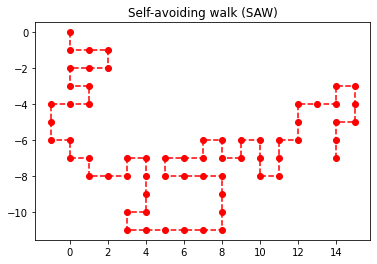

In [10]:
N= 64
poly = np.zeros((2, N)) #polymer 
for n in range(N-1): #N steps
    update_pos(n, poly, 'saw', Lattice)
plt.plot(poly[0,:], poly[1,:], 'ro--')
plt.title('Self-avoiding walk (SAW)')

Text(0.5, 1.0, 'Self-avoiding walk (SAW)')

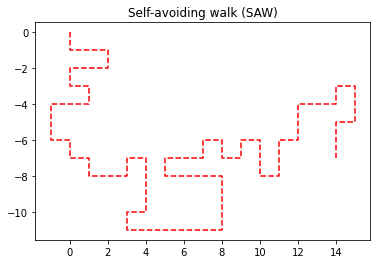

In [11]:
plt.plot(poly[0,:], poly[1,:], 'r--')
plt.title('Self-avoiding walk (SAW)')

In [12]:
poly

array([[  0.,   0.,   1.,   2.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,
         -1.,  -1.,  -1.,   0.,   0.,   1.,   1.,   2.,   3.,   3.,   4.,
          4.,   4.,   4.,   3.,   3.,   4.,   5.,   6.,   7.,   8.,   8.,
          8.,   8.,   7.,   6.,   5.,   5.,   6.,   7.,   7.,   8.,   8.,
          9.,   9.,  10.,  10.,  10.,  11.,  11.,  11.,  12.,  12.,  12.,
         13.,  14.,  14.,  15.,  15.,  15.,  14.,  14.,  14.],
       [  0.,  -1.,  -1.,  -1.,  -2.,  -2.,  -2.,  -3.,  -3.,  -4.,  -4.,
         -4.,  -5.,  -6.,  -6.,  -7.,  -7.,  -8.,  -8.,  -8.,  -7.,  -7.,
         -8.,  -9., -10., -10., -11., -11., -11., -11., -11., -11., -10.,
         -9.,  -8.,  -8.,  -8.,  -8.,  -7.,  -7.,  -7.,  -6.,  -6.,  -7.,
         -7.,  -6.,  -6.,  -7.,  -8.,  -8.,  -7.,  -6.,  -6.,  -5.,  -4.,
         -4.,  -4.,  -3.,  -3.,  -4.,  -5.,  -5.,  -6.,  -7.]])

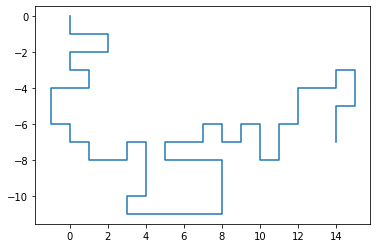

In [13]:
plt.plot(poly[0,:], poly[1,:])

In [14]:
poly

array([[  0.,   0.,   1.,   2.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,
         -1.,  -1.,  -1.,   0.,   0.,   1.,   1.,   2.,   3.,   3.,   4.,
          4.,   4.,   4.,   3.,   3.,   4.,   5.,   6.,   7.,   8.,   8.,
          8.,   8.,   7.,   6.,   5.,   5.,   6.,   7.,   7.,   8.,   8.,
          9.,   9.,  10.,  10.,  10.,  11.,  11.,  11.,  12.,  12.,  12.,
         13.,  14.,  14.,  15.,  15.,  15.,  14.,  14.,  14.],
       [  0.,  -1.,  -1.,  -1.,  -2.,  -2.,  -2.,  -3.,  -3.,  -4.,  -4.,
         -4.,  -5.,  -6.,  -6.,  -7.,  -7.,  -8.,  -8.,  -8.,  -7.,  -7.,
         -8.,  -9., -10., -10., -11., -11., -11., -11., -11., -11., -10.,
         -9.,  -8.,  -8.,  -8.,  -8.,  -7.,  -7.,  -7.,  -6.,  -6.,  -7.,
         -7.,  -6.,  -6.,  -7.,  -8.,  -8.,  -7.,  -6.,  -6.,  -5.,  -4.,
         -4.,  -4.,  -3.,  -3.,  -4.,  -5.,  -5.,  -6.,  -7.]])

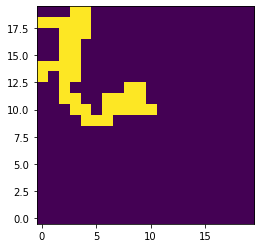

In [15]:
plt.imshow(Lattice[40:60, 40:60], origin='lower')

(array([38., 30., 14., 10.,  1.,  2.,  2.,  0.,  2.,  1.]),
 array([  1. ,  33.4,  65.8,  98.2, 130.6, 163. , 195.4, 227.8, 260.2,
        292.6, 325. ]),
 <BarContainer object of 10 artists>)

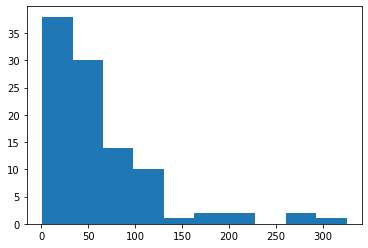

In [16]:
plt.hist(Rsq_all)

In [17]:
N_all = [2**(5+i) for i in range(7)]
RvsN = np.zeros((len(N_all),))
Lattice = np.zeros((500,500))
Lattice[250,250] = 1

In [18]:
Repeats = 100
for N_index in range(len(N_all)):
    N = N_all[N_index]
    Rsq_all = np.zeros((Repeats,))
    for sample in range(Repeats): #for multiple values of R squared
        poly = np.zeros((2, N)) #polymer 
        for n in range(N-1): #N steps
            update_pos(n, poly, 'saw', Lattice)
        Rsq = np.sum(np.square(poly[:,N-1]-poly[:,0])) #R^2
        Rsq_all[sample] = Rsq
    RvsN[N_index] = np.sqrt(np.mean(Rsq_all))

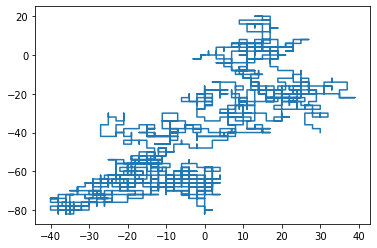

In [19]:
plt.plot(poly[0,:], poly[1,:])

Text(0.5, 0, 'logN')

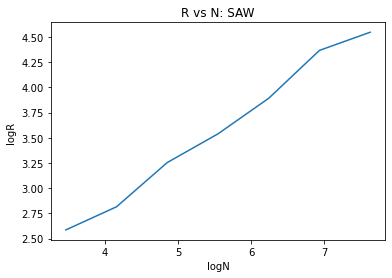

In [20]:
plt.plot(np.log(N_all), np.log(RvsN))
plt.title('R vs N: SAW')
plt.ylabel('logR ')
plt.xlabel('logN')

In [21]:
N_all = [2**(5+i) for i in range(7)]
RvsN = np.zeros((len(N_all),))

In [22]:
Repeats = 100
for N_index in range(len(N_all)):
    N = N_all[N_index]
    Rsq_all = np.zeros((Repeats,))
    for sample in range(Repeats): #for multiple values of R squared
        poly = np.zeros((2, N)) #polymer 
        for n in range(N-1): #N steps
            update_pos(n, poly, )
        Rsq = np.sum(np.square(poly[:,N-1]-poly[:,0])) #R^2
        Rsq_all[sample] = Rsq
    RvsN[N_index] = np.sqrt(np.mean(Rsq_all))

Text(0.5, 0, 'logN')

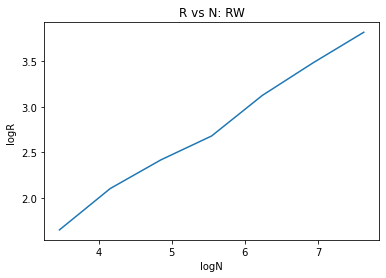

In [23]:
plt.plot(np.log(N_all), np.log(RvsN))
plt.title('R vs N: RW')
plt.ylabel('logR ')
plt.xlabel('logN')

Text(0.5, 1.0, 'RW')

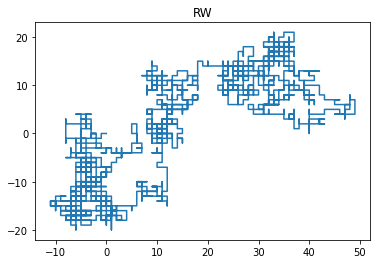

In [24]:
plt.plot(poly[0,:], poly[1,:])
plt.title('RW')

In [25]:
N

2048

# Question 2: Transition between B and S form DNA

Plot of the relative extension

In [26]:
f = np.linspace(0, 80, 10000) # force in pN
rel_ext = (1+ 1.9*np.exp(-1500+21.74*f))/ (1+ np.exp(-1500+21.74*f))

Text(0.5, 0.98, 'Relative extension vs force (pN)')

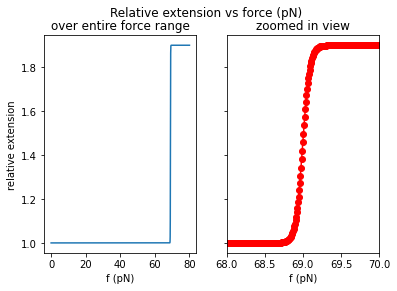

In [27]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(f, rel_ext)
ax[0].set_title('over entire force range')
ax[0].set_ylabel('relative extension')
ax[0].set_xlabel('f (pN)')
ax[1].plot(f, rel_ext, 'ro-')
ax[1].set_xlim(68, 70)
ax[1].set_xlabel('f (pN)')
ax[1].set_title('zoomed in view')
fig.suptitle('Relative extension vs force (pN)')